In [13]:
import numpy as np
import pandas as pd
from nptdms import TdmsFile as TF
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline

In [8]:
filestr = "\\calibration.tdms"
basepath = "Z:\\Test Data\\Raw Data\\RoomTempK\\"

In [21]:
file = TF(basepath+"2018-06-04\\hotplatelv2.tdms")
file2 = TF(basepath+"2018-06-04\\hotplatelv2hotplatelv3.tdms")

In [22]:
df = file.object("Non HVOF Process Avg").as_dataframe()
df2 = file2.object("Non HVOF Process Avg").as_dataframe()

Text(0.5,1,'Hotplate lv2')

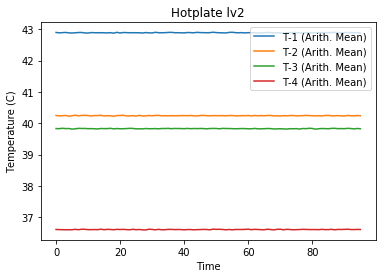

In [93]:
plt.plot(df)
plt.legend(df.columns)
plt.ylabel('Temperature (C)')
plt.xlabel('Time')
plt.title('Hotplate lv2')

Text(0.5,1,'Hot plate level 3')

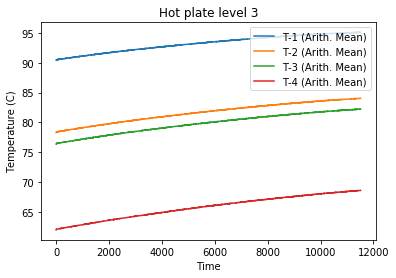

In [94]:
plt.plot(df2)
plt.legend(df2.columns)
plt.ylabel('Temperature (C)')
plt.xlabel('Time')
plt.title('Hot plate level 3')

In [31]:
cal = TF("Z:\\Test Data\\Raw Data\\RoomTempK\\Calibration1.tdms")

In [35]:
caldf = cal.object("Data").as_dataframe()

In [36]:
caldf

,reference,hot,cold,contact,q (Arith. Mean)
0,43.491550,42.056402,41.502658,42.229447,5420.623541
1,91.647141,84.986000,82.442647,85.780798,24994.906856
2,128.408196,117.449802,113.256617,118.760172,41307.403983
3,157.138080,142.669261,137.081599,144.415405,54856.917751
4,191.549483,173.120983,166.069306,175.324632,69354.029296


Text(0.5,0,'Hot Plate Dial Level')

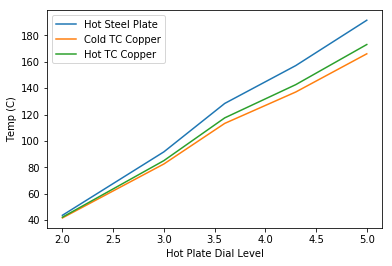

In [45]:
x = [2,3,3.6,4.3,5]
plt.plot(x, caldf['reference'],label = "Hot Steel Plate")
plt.plot(x, caldf['cold'], label = 'Cold TC Copper')
plt.plot(x, caldf['hot'], label = 'Hot TC Copper')
plt.legend()
plt.ylabel('Temp (C)')
plt.xlabel('Hot Plate Dial Level')

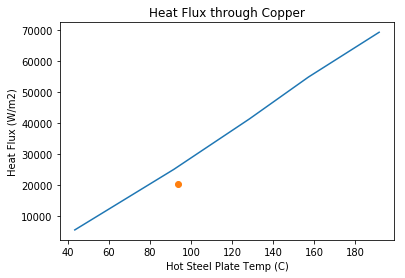

In [91]:
plt.plot(caldf['reference'], caldf['q (Arith. Mean)'])
plt.xlabel('Hot Steel Plate Temp (C)')
plt.ylabel('Heat Flux (W/m2)')
plt.title('Heat Flux through Copper')
plt.plot(93.69,20287, marker = "o")

In [49]:
lv3 = TF('Z:\\Test Data\\Raw Data\\RoomTempK\\2018-05-30\\Run1_sensors.tdms')

In [52]:
testdf = lv3.object('Non HVOF Process Avg').as_dataframe()

In [72]:
times = lv3.object('Global', 'Time').data[:-1]
zero = min(times)
newtime = []
for time in times:
    newtime = np.append(newtime, (time-zero).seconds)
testdf.index=np.append(newtime,170)

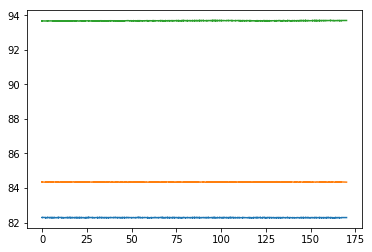

In [73]:
plt.plot(testdf)

In [75]:
temps = testdf.mean()

In [79]:
(temps[1]-temps[0])*400/(1.6*.0254)

20287.739473789974

In [86]:
(testdf['Temperature_1 (Arith. Mean)']-testdf['Temperature_0 (Arith. Mean)']).mean()

2.0612343305370424

In [92]:
temps

Temperature_0 (Arith. Mean)    82.284209
Temperature_1 (Arith. Mean)    84.345443
Temperature_2 (Arith. Mean)    93.693423
dtype: float64